In [44]:
# Start loading libraries

#! pip install yfinance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#! pip install pmdarima
import pmdarima as pm
from pmdarima import model_selection
from pmdarima.model_selection import SlidingWindowForecastCV

import scipy
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron
from arch.unitroot import KPSS

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.graphics.tsaplots import plot_acf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

import arch
import math
#from matplotlib.ticker import NullFormatter
#import yfinance as yf
#import warnings; warnings.simplefilter('ignore')
#%matplotlib inline

In [45]:
xls_file = pd.ExcelFile("Data_monthly_final.xlsx") # Read Excel
df1=xls_file.parse("Brent") # Read the first sheet (Portfolio holdings)

#df1["Timestamp"] = df1["Date"].astype('datetime64[ns]') # Convert column to date format
df1 = df1.set_index(['Timestamp']) # use first column as index

#df1.to_excel("values.xlsx")  #print to excel



<AxesSubplot:xlabel='Timestamp'>

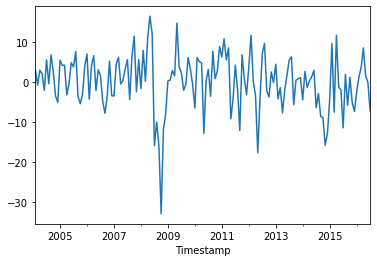

In [68]:
spot = df1["LCOc1"]
#spot = np.log(spot)
spot = spot.loc['2004-01-31':'2022-11-30'].diff().dropna()
spot_train = spot.loc[:'2016-07-31']
spot_train.plot()

In [69]:
# Load the data and split it into separate pieces
#data = np.array(spot.dropna())**2
data = np.array(spot.dropna())
train, test = model_selection.train_test_split(data, train_size=(spot_train.shape[0]))
#train, test = model_selection.train_test_split(data, train_size=(spot.shape[0]-1))

In [70]:
# Fit a simple auto_arima model
#autoarima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True,
                      #seasonal=True, m=12)

#arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      #suppress_warnings=True, maxiter=5,
                      #seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
# x = np.arange(test.shape[0])
# plt.scatter(x, test, marker='x')
# plt.plot(x, autoarima.predict(n_periods=test.shape[0]))
# plt.title('Actual test samples vs. forecasts')
# plt.show()

In [71]:
#autoarima.summary()

In [72]:
### The same with non-automatic ARIMA from pmdarima ####

#ar = pm.ARIMA(order=(0,1,0), with_intercept=False)
#ar.fit(spot_train)
#ar.summary()

In [81]:
garch = arch.arch_model(train,mean='Zero', vol='GARCH', p=1, q=1)
#garch = arch.arch_model(train, vol='GARCH', p=1, q=1)
results = garch.fit()

Iteration:      1,   Func. Count:      5,   Neg. LLF: 544.3389888128125
Iteration:      2,   Func. Count:     11,   Neg. LLF: 490.15034058621484
Iteration:      3,   Func. Count:     16,   Neg. LLF: 488.44128328584793
Iteration:      4,   Func. Count:     20,   Neg. LLF: 488.4403166691194
Iteration:      5,   Func. Count:     24,   Neg. LLF: 488.43882576375177
Iteration:      6,   Func. Count:     28,   Neg. LLF: 488.43863403746116
Iteration:      7,   Func. Count:     32,   Neg. LLF: 488.4386213104642
Iteration:      8,   Func. Count:     35,   Neg. LLF: 488.43862131038856
Optimization terminated successfully    (Exit mode 0)
            Current function value: 488.4386213104642
            Iterations: 8
            Function evaluations: 35
            Gradient evaluations: 8


In [74]:
print(results.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.007
Vol Model:                      GARCH   Log-Likelihood:               -488.439
Distribution:                  Normal   AIC:                           982.877
Method:            Maximum Likelihood   BIC:                           991.909
                                        No. Observations:                  150
Date:                Wed, Nov 01 2023   Df Residuals:                      150
Time:                        19:26:51   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          4.4421      2.642      1.681  9.274e-02   [ -0.73

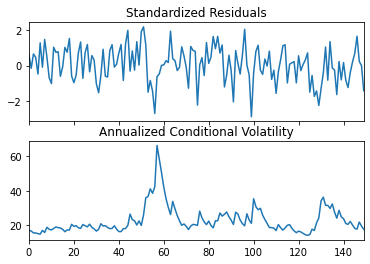

In [75]:
# Plot the standardized residuals
fig = results.plot(annualize='M')
#fig = results.plot()
plt.show()

In [86]:
yhat = results.forecast(horizon=75)
#np.exp(yhat.variance.values)
#math.sqrt(yhat.variance.values.flatten())
#math.sqrt(yhat.variance.values.flatten()[0])
yhat.variance.values.flatten()[0]

34.59737519891074

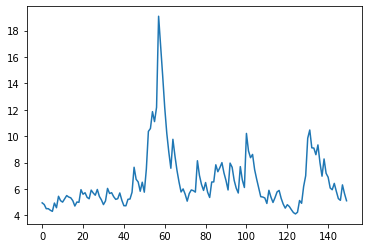

In [78]:
# Generate statistics and diagnostic plots

a= results.conditional_volatility
plt.plot(a)

In [79]:
a

array([ 4.94352777,  4.81799945,  4.50253207,  4.50320577,  4.3843827 ,
        4.29978976,  4.929644  ,  4.57459538,  5.44217283,  5.10940372,
        4.99995522,  5.24274784,  5.49588064,  5.38499855,  5.32568745,
        5.10820511,  4.70408296,  5.00678363,  4.98553243,  5.94350793,
        5.59957861,  5.71086375,  5.36140673,  5.25385908,  5.91009329,
        5.68998001,  5.52151724,  5.95883633,  5.43292125,  5.16942229,
        4.81345887,  5.08816164,  6.03900138,  5.65493416,  5.71427796,
        5.41420935,  5.21087371,  5.25923295,  5.694339  ,  5.1410104 ,
        4.72877335,  4.72244359,  5.21313563,  5.23440186,  5.75088717,
        7.64098435,  6.73018273,  6.52683315,  5.82336259,  6.50761232,
        5.75371288,  7.49943819, 10.35844476, 10.58012803, 11.85586442,
       11.10162276, 12.18362016, 19.08516412, 16.86792299, 14.55863738,
       12.16021938, 10.22472971,  8.78471285,  7.5662937 ,  9.75988081,
        8.50448779,  7.40018409,  6.5195714 ,  5.76904337,  5.99

In [9]:
def smape_kun(y_true, y_pred):
    return np.mean(np.abs(y_pred - y_true) / ((np.abs(y_pred) + np.abs(y_true))/2))*100

In [10]:
### with pmdarima sliding window ####

cv = SlidingWindowForecastCV(window_size=151)
predictions = model_selection.cross_val_predict(
    ar, spot, cv=cv, verbose=0)


c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
c:\Users\tatuh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self.

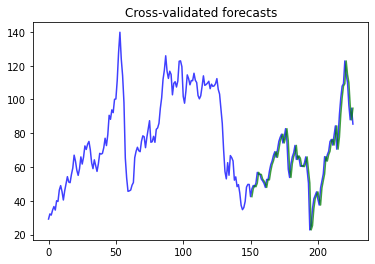

In [12]:
exp_predictions = np.exp(predictions)
exp_spot= np.exp(spot)
exp_test = np.exp(test)
exp_train = np.exp(train)

x_axis = np.arange(exp_spot.shape[0])
n_test = exp_predictions.shape[0]

plt.plot(x_axis, exp_spot, alpha=0.75, c='b')
plt.plot(x_axis[-n_test:], exp_predictions, alpha=0.75, c='g')  # Forecasts
plt.title("Cross-validated forecasts")
plt.show()

In [13]:
error = mean_squared_error(exp_test, exp_predictions)
print('Mean Squared Error: %.3f' % error)
error2 = mean_absolute_error(exp_test, exp_predictions)
print('Mean Absolute Error: %.3f' % error2)
error3 = mean_absolute_percentage_error(exp_test, exp_predictions)
print('Mean Absolute Percentage Error: %.3f' % (error3*100))
error4 = smape_kun(exp_test, exp_predictions)
print('Symmetric Mean Absolute Percentage Error: %.3f' % error4)

Mean Squared Error: 46.880
Mean Absolute Error: 5.234
Mean Absolute Percentage Error: 9.058
Symmetric Mean Absolute Percentage Error: 8.542


In [12]:
### same with built-in function ###

#predictions22 = model_selection.cross_val_score(
#    ar, spot, scoring='mean_absolute_error', cv=cv, verbose=0)
#np.average(predictions22)

In [14]:
#### MASE ###

abs_errors = abs(exp_predictions - exp_test)
mae_naive_list = []

for x in range(len(exp_test)):
    insample_data = exp_spot[x:-(len(exp_test)-x)]
    mae_insample = np.mean(abs(insample_data.diff().dropna()))
    mae_naive_list.append(mae_insample)

mase = np.mean(abs_errors / mae_naive_list)

print('Mean Absolute Scaled Error: %.3f' % mase)

Mean Absolute Scaled Error: 1.033


In [14]:
### Returns ###

returns = []

test_app2 = list(exp_test)
test_app2.insert(0, exp_train[-1]) ## append last of train data
price_moves = np.array(pd.DataFrame(test_app2).pct_change().dropna()+1)

pred_app2 = list(predictions)

test_shift2 = list(test)
test_shift2.insert(0, train[-1])
test_shift2.pop()

dir_pred2 = np.array(np.sign([a - b for a, b in zip(pred_app2,test_shift2)]))

for t in range(len(dir_pred2)):
    if dir_pred2[t] == 1:
            returns.append(price_moves[t])
        
    if dir_pred2[t] == -1:
        returns.append(1/price_moves[t])

returns = pd.DataFrame(returns)
returns


,0
0,0.902636
1,1.042942
2,0.984509
3,0.957004
4,1.125817
...,...
71,1.043632
72,1.140118
73,1.096976
74,0.927555


In [23]:
### Returns t-test ###

t_statistic, p_value = stats.ttest_1samp(a=returns, popmean=1, alternative='greater') ### one tailed test?


print(t_statistic , p_value)

[1.7510438] [0.04201351]


In [16]:
### Merton test ###

test_app = list(test)
test_app.insert(0, train[-1]) ## append last of train data
dir = np.array(np.sign(pd.DataFrame(test_app).diff().dropna()))

pred_app = list(predictions)

test_shift = list(test)
test_shift.insert(0, train[-1])
test_shift.pop()

dir_pred = np.array(np.sign([a - b for a, b in zip(pred_app,test_shift)]))

q_minus = 0
q_plus = 0
pred_minus = 0
pred_plus = 0

for t in range(len(dir)):
    if dir[t] == 1:
        q_plus += 1
        if dir_pred[t] == 1:
            pred_plus += 1
    if dir[t] == -1:
        q_minus += 1
        if dir_pred[t] == -1:
            pred_minus += 1

print('Merton test: %.3f' % ((pred_plus / q_plus) + (pred_minus / q_minus)))

Merton test: 1.119
